In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

In [3]:
df=pd.read_csv('archive/creditcard.csv')

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [11]:
counts = df.Class.value_counts()

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

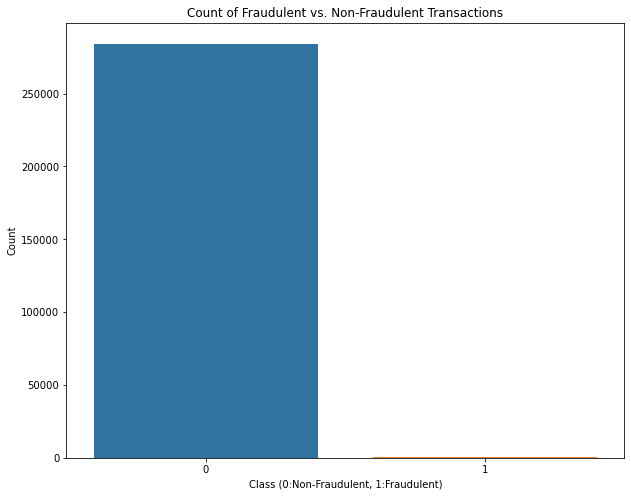

In [12]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [5]:
legit = df[df.Class == 0]
fraud =df[df.Class == 1]

In [6]:
legit_sample = legit.sample(n=30000)

In [7]:
df_fraud_oversampled = resample(fraud, 
                                 replace=True,   
                                 n_samples=10000 , 
                                 random_state=0) 

df_oversampled = pd.concat([df_fraud_oversampled, legit_sample])

In [8]:
df_oversampled.shape

(40000, 31)

In [6]:
X = df_oversampled.drop(columns='Class', axis=1)
Y = df_oversampled['Class']

In [7]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, Y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(40000, 26)

In [14]:
counts = df_oversampled.Class.value_counts()

Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

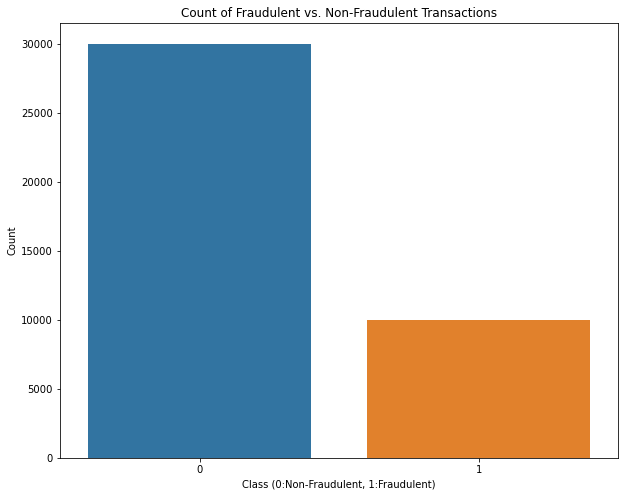

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [8]:
scaler = MinMaxScaler()
X_new=scaler.fit_transform(X)
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68633,53076.0,1.296231,0.417447,0.193963,0.901644,0.130531,-0.371634,0.158126,-0.202669,-0.079512,...,-0.029559,-0.112114,-0.220002,-0.121022,-0.440454,0.671540,-0.413518,0.032838,0.020600,1.18
10897,18690.0,-15.398845,7.472324,-19.026912,11.165526,-6.893856,-2.120937,-14.913330,-0.721214,-7.175097,...,1.111502,-2.444884,0.727495,-0.345078,-0.981749,0.995271,0.816762,2.262942,-1.178063,1.00
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,0.645974,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52
79536,58067.0,-0.264869,3.386140,-3.454997,4.367629,3.336060,-2.053918,0.256890,-2.957235,-2.855797,...,0.482513,-1.394504,-0.166029,-1.452081,-0.251815,1.243461,0.452787,0.132218,0.424599,1.00
151462,95559.0,-16.308650,11.614801,-19.739386,10.463866,-12.599146,-1.202393,-23.380508,-5.781133,-7.811022,...,2.106034,-4.884983,1.140910,1.392953,0.348997,-2.167510,-0.798754,-2.942775,-0.462680,1.63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171285,120569.0,-0.251796,0.707796,-0.542789,-2.102182,0.040493,-1.725989,0.796277,0.025942,0.614489,...,-0.243942,0.050895,0.187698,-0.017265,0.064476,-0.610933,-0.372124,0.077306,0.140104,8.14
138549,82716.0,1.210965,-0.043560,0.635756,0.899367,-0.698891,-0.585779,-0.173448,-0.073145,0.687120,...,-0.132165,-0.109261,-0.099589,-0.069652,0.446295,0.537056,0.411208,-0.016987,0.012553,12.36
15763,27198.0,1.236103,0.291621,0.188300,0.500906,-0.157327,-0.561305,-0.025536,-0.033587,-0.198959,...,-0.061076,-0.257811,-0.781130,0.076609,-0.037961,0.228446,0.097420,-0.027606,0.017268,1.98
15034,26372.0,-1.302555,0.469460,1.526885,0.128371,0.941855,0.650151,0.144497,0.285458,0.105825,...,-0.409330,-0.040171,-0.000424,-0.575018,-0.829739,0.720746,-0.339815,-0.342793,-0.020054,10.00


In [9]:
df_oversampled['Class'].value_counts()

0    30000
1    10000
Name: Class, dtype: int64

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [11]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,Y_train)
Y_predict=model.predict(X_test)
TN,FP,FN,TP=confusion_matrix(Y_test, Y_predict).ravel()
ACC=(TP+TN)/(TP+TN+FP+FN)
PRC=TP/(TP+FP)
recall=TP/(TP+FN)
FAR=FP/(FP+TN)
score=(2*PRC*recall)/(PRC+recall)
print(f"ACC = {round(ACC, 2)*100}%  PRC = {round(PRC, 2)*100}%  Recall = {round(recall, 2)*100}% FAR = {round(FAR, 5)*100}%  score = {round(score, 2)*100}%") 

ACC = 98.0%  PRC = 94.0%  Recall = 100.0% FAR = 2.1%  score = 97.0%
ACC = 97.0%  PRC = 90.0%  Recall = 100.0% FAR = 3.533%  score = 95.0%
ACC = 96.0%  PRC = 87.0%  Recall = 100.0% FAR = 5.0%  score = 93.0%
ACC = 95.0%  PRC = 84.0%  Recall = 100.0% FAR = 6.5%  score = 91.0%
ACC = 94.0%  PRC = 81.0%  Recall = 100.0% FAR = 7.6499999999999995%  score = 90.0%


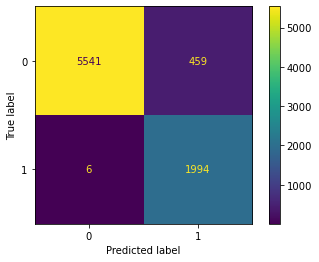

In [12]:
plot_confusion_matrix(model,X_test,Y_test)